# Study of connectivity distribution
This notebook is to study the connectivity distrubtion

In [1]:
from __future__ import print_function
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from hopfield import Hopfield

%matplotlib inline
sns.set(font_scale=2.0)

In [2]:
prng = np.random.RandomState(seed=100)
normalize = True
T = 1.0
n_store = 7

N_samples = 1000

## Dependency in how many states are added
Here we see whether the distribution of synaptic influences depends on the state of the vector.

First we start with only two

In [3]:
n_dim = 400

nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
list_of_patterns = nn.generate_random_patterns(n_dim)
nn.train(list_of_patterns, normalize=normalize)

We generate two random patterns and test whether the field (h) is dependent on the initial state. We see very similar **normal** behavior for both of them

In [4]:
x = np.dot(nn.w, np.sign(prng.normal(size=n_dim)))
y = np.dot(nn.w, np.sign(prng.normal(size=n_dim)))

0.9904938033


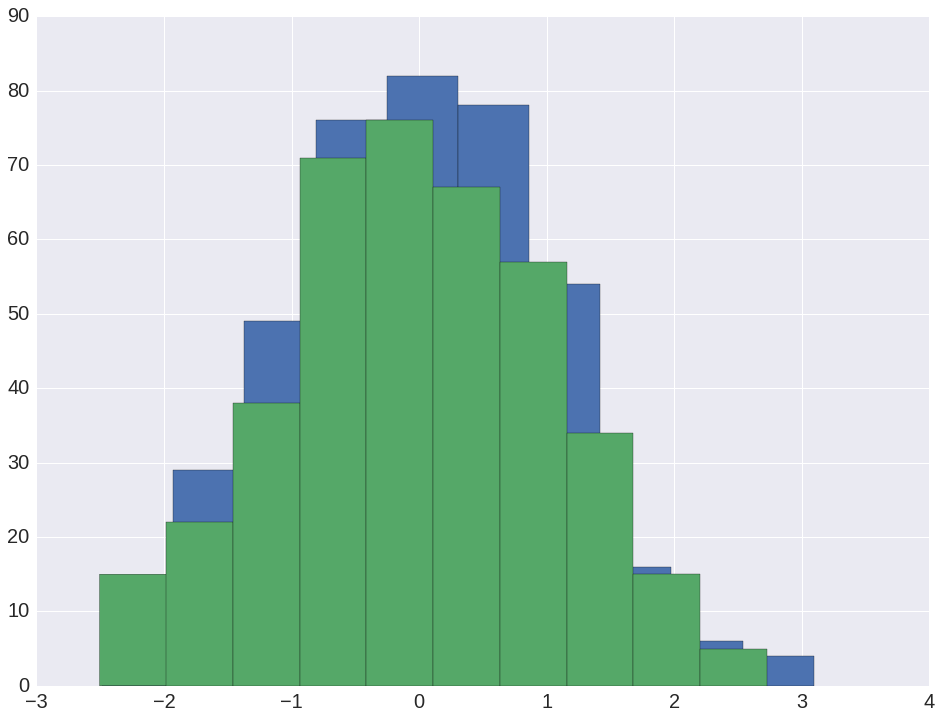

In [5]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.hist(x)
ax.hist(y)
print(np.std(x))

We now then try this with 10 patterns to see how the distributions behave

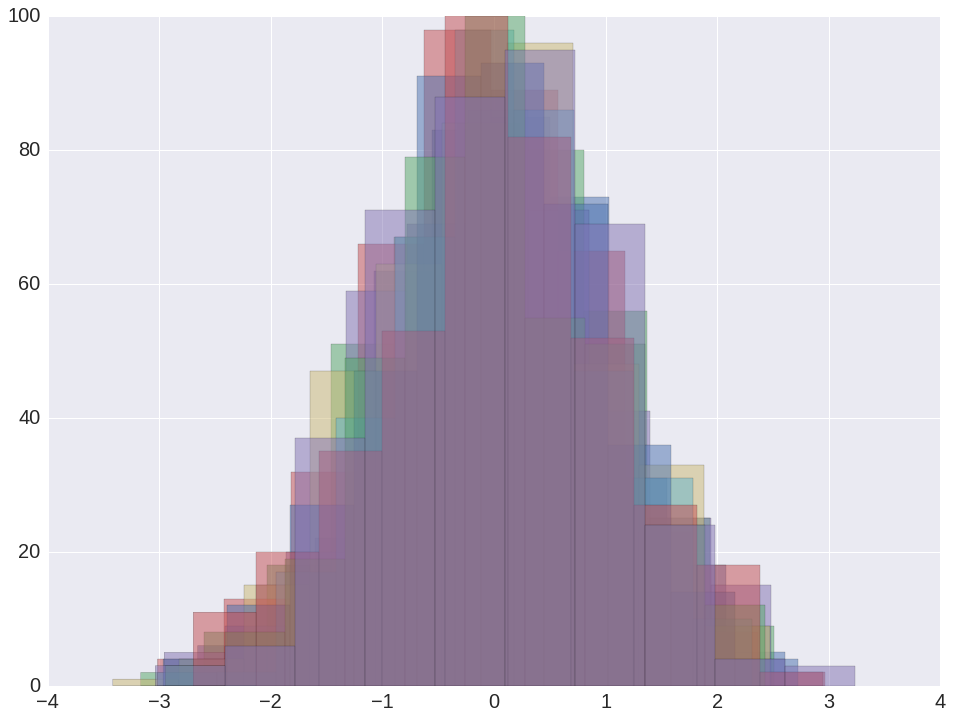

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for i in range(10):
    x = np.dot(nn.w, np.sign(prng.normal(size=n_dim)))
    ax.hist(x, alpha=0.5)

We see that the normal distribution is mainted, then we calculate the field h (result of the np.dot(w, s) calculation) for a bunch of different initial random states and concatenate the results to see how the whole distribution looks like

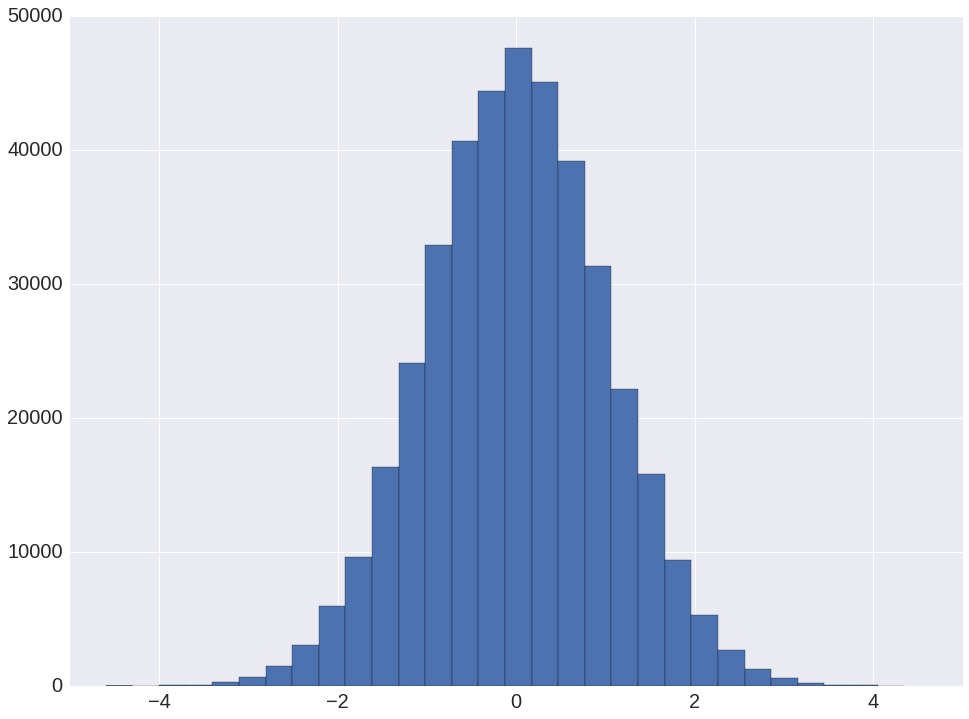

In [7]:
n_dim = 400

nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
list_of_patterns = nn.generate_random_patterns(n_dim)
nn.train(list_of_patterns, normalize=normalize)


x = np.empty(n_dim)

for i in range(N_samples):
    h = np.dot(nn.w, np.sign(prng.normal(size=n_dim)))
    x = np.concatenate((x, h))


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(x, bins=30)

In [8]:
print(np.var(x))
print(nn.sigma)

1.00648912771
0.353553390593


# Dependence on network size

Now we test test how the histogram looks for different sizes

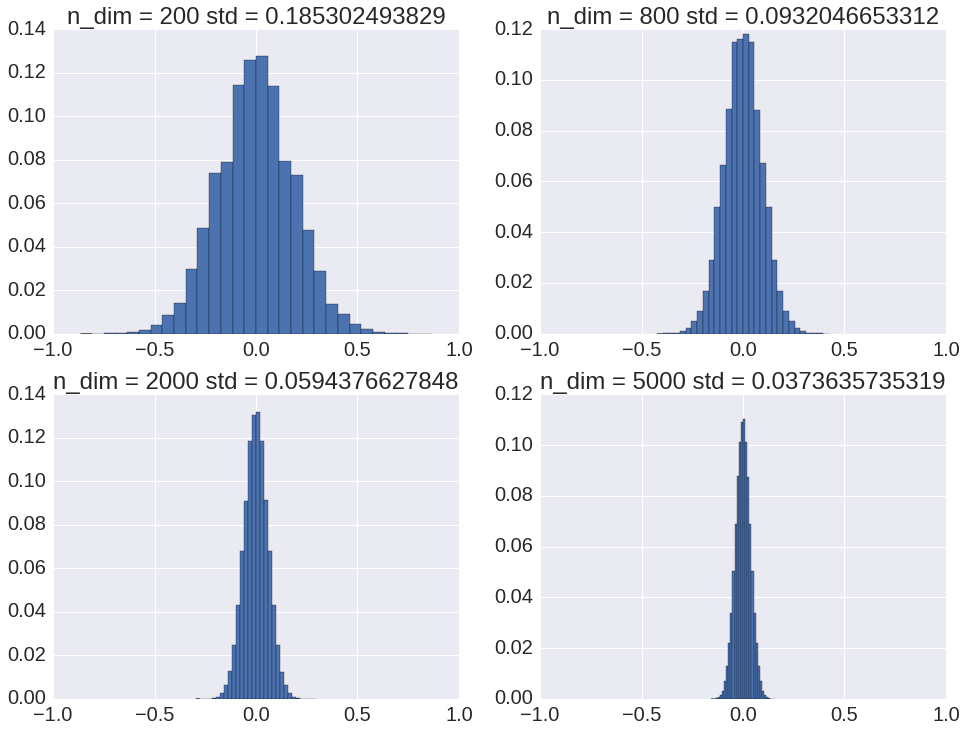

In [9]:
n_dimensions = [200, 800, 2000, 5000]
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2)

for index, n_dim in enumerate(n_dimensions):

    nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
    list_of_patterns = nn.generate_random_patterns(n_store)
    nn.train(list_of_patterns, normalize=normalize)

    x = np.empty(n_dim)
    for i in range(N_samples):
        h = np.dot(nn.w, np.sign(prng.normal(size=n_dim)))
        x = np.concatenate((x, h))
    
    ax = fig.add_subplot(gs[index//2, index%2])
    ax.set_xlim([-1, 1])
    ax.set_title('n_dim = ' + str(n_dim) + ' std = ' + str(np.std(x)))
    
    weights = np.ones_like(x)/float(len(x))
    n, bins, patches = ax.hist(x, bins=30, weights=weights, normed=False)

Now we calculate the variance of the h vector as a function of the dimension

In [10]:
n_dimensions = np.logspace(1, 4, num=20)
variances = []
standar_deviations = []

for index, n_dim in enumerate(n_dimensions):
    print('number', index, 'of', n_dimensions.size, '   n_dim =', n_dim)

    n_dim = int(n_dim)
  

    nn = Hopfield(n_dim=n_dim, T=T, prng=prng)
    list_of_patterns = nn.generate_random_patterns(n_store)
    nn.train(list_of_patterns, normalize=normalize)

    x = np.empty(n_dim)
    for i in range(N_samples):
        h = np.dot(nn.w, np.sign(prng.normal(size=n_dim)))
        x = np.concatenate((x, h))
        
    variances.append(np.var(x))
    standar_deviations.append(np.std(x))


number 0 of 20    n_dim = 10.0
number 1 of 20    n_dim = 14.3844988829
number 2 of 20    n_dim = 20.6913808111
number 3 of 20    n_dim = 29.7635144163
number 4 of 20    n_dim = 42.8133239872
number 5 of 20    n_dim = 61.5848211066
number 6 of 20    n_dim = 88.586679041
number 7 of 20    n_dim = 127.42749857
number 8 of 20    n_dim = 183.298071083
number 9 of 20    n_dim = 263.665089873
number 10 of 20    n_dim = 379.269019073
number 11 of 20    n_dim = 545.559478117
number 12 of 20    n_dim = 784.759970351
number 13 of 20    n_dim = 1128.83789168
number 14 of 20    n_dim = 1623.77673919
number 15 of 20    n_dim = 2335.72146909
number 16 of 20    n_dim = 3359.81828628
number 17 of 20    n_dim = 4832.93023857
number 18 of 20    n_dim = 6951.92796178
number 19 of 20    n_dim = 10000.0


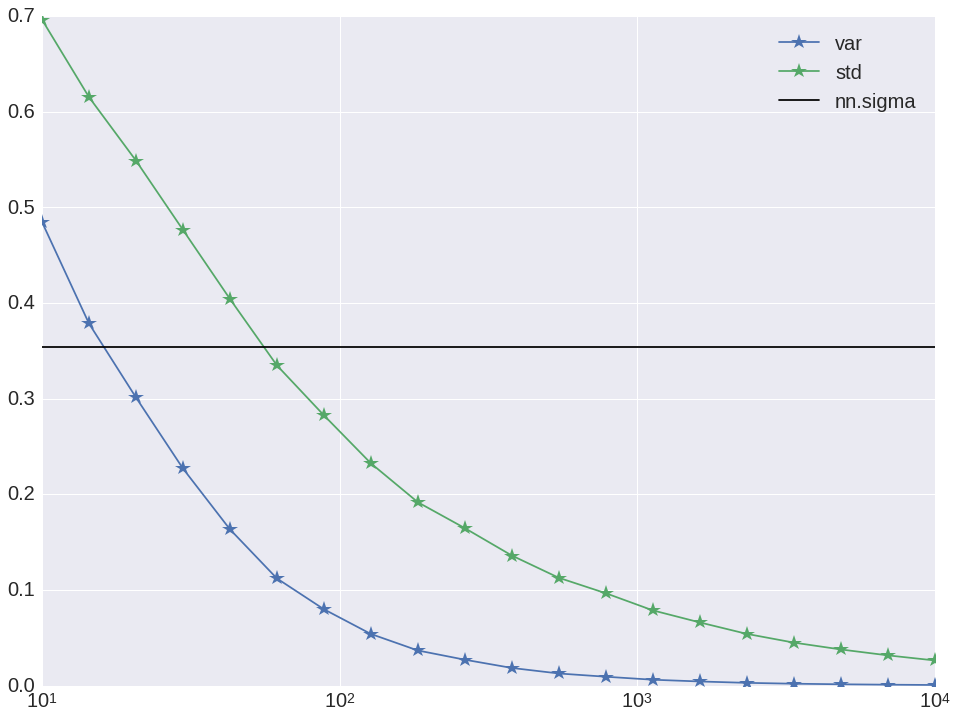

In [11]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.semilogx(n_dimensions, variances,'*-', markersize=16, label='var')
ax.semilogx(n_dimensions, standar_deviations, '*-', markersize=16, label='std')
ax.axhline(y=nn.sigma, color='k', label='nn.sigma')
ax.legend()